In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [3]:
df1= pd.read_csv('student_scores1.csv')
df1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
x=df1['Hours'].to_numpy()
y=df1['Scores'].to_numpy()
# These lines extract the 'Hours' and 'Scores' columns from a DataFrame df1 and
#convert them to NumPy arrays. 'Hours' will be the input feature (x), and 'Scores' will be the target variable (y).

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=100)
# This code splits the data into training and testing sets. It uses 80% of the data for training 
#(test_size=0.2 means 20% for testing) and sets a random state for reproducibility.

x_train2=x_train.reshape(-1,1)
x_test2=x_test.reshape(-1,1)
y_train2=y_train.reshape(-1,1)
y_test2=y_test.reshape(-1,1)

#These lines reshape the data to ensure it's in the correct format for most machine learning algorithms in scikit-learn. The -1 in reshape(-1,1) 
#automatically calculates the size of that dimension to match the data.

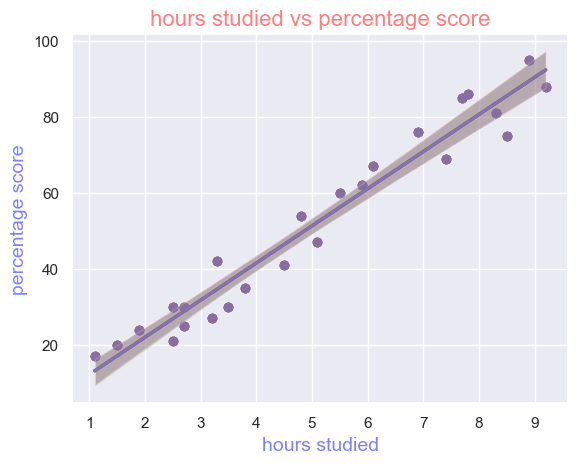

In [10]:
lmgraph=sns.regplot(x=x,y=y)
lmgraph.axes.set_title("hours studied vs percentage score", size=16,color='red',alpha=0.5)
lmgraph.set_xlabel("hours studied", size=14, color='blue', alpha=0.5)
lmgraph.set_ylabel("percentage score", size=14, color='blue', alpha=0.5)
plt.show()

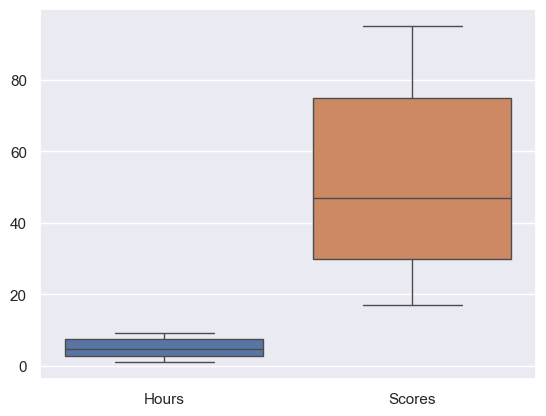

In [11]:
sns.boxplot(data=df1)
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
for name, method in[('Linear Regression', LinearRegression())]:
    method.fit(x_train2,y_train2)
    predict=method.predict(x_test2)
print('Method: {}'.format(name))
#coefficients
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
print('\nCoefficient: {:0.2f}'.format((float(method.coef_))))

print('\nR2: {:0.2f}'.format(r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))
      

Method: Linear Regression

Intercept: 1.99

Coefficient: 9.84

R2: 0.91
Mean Absolute Error: 4.14
Mean Squared Error: 20.64
Root Mean Squared Error: 4.54


C:\Users\Jaskirat kaur\AppData\Local\Temp\ipykernel_6700\750517105.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
C:\Users\Jaskirat kaur\AppData\Local\Temp\ipykernel_6700\750517105.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('\nCoefficient: {:0.2f}'.format((float(method.coef_))))


The deprecation warnings you're encountering are related to changes in NumPy 1.25, which aims to modify how arrays are converted to scalars. To resolve these warnings and future-proof your code, you should modify the lines causing the warnings as follows:

For the intercept:

python
print('\nIntercept: {:0.2f}'.format(float(method.intercept_.item())))

For the coefficient:
print('\nCoefficient: {:0.2f}'.format(float(method.coef_.item())))
The item() method is used to extract a single element from the array, which is the recommended way to convert a size-1 array to a scalar in NumPy 1.25 and later versions12. This approach ensures that you're explicitly extracting a single value from the array before converting it to a float, avoiding the deprecated behavior of implicitly converting arrays with ndim > 0 to scalars3.

By making these changes, you'll eliminate the deprecation warnings and ensure your code remains compatible with future versions of NumPy.


In [18]:
predict2=predict.reshape(-1)
diff = predict2-y_test
FcstTble= pd.DataFrame({'Actual':y_test, 'Predicted':predict2.round(2), 'Difference':diff.round(2)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,25,28.55,3.55
1,35,39.36,4.36
2,42,34.45,-7.55
3,62,60.02,-1.98
4,20,16.74,-3.26
